# Index scores

This notebook generates index scores that compare either the proportion or rate within a cluster to the national average. The source of anciliarry data is listed in the manuscript. 

The `darribas/gds_py:6.1` Docker container was used to create a computational environment.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cluster_labels = pd.read_csv("sentinel_gb_encoder_map_3_20210317_smoothed_10k_labels.csv", index_col=0)
cluster_labels

,cluster,PCDS
0,0,AB10 1AB
1,0,AB10 1AF
2,2,AB10 1AG
3,2,AB10 1AH
4,0,AB10 1AL
...,...,...
1710710,4,ZE3 9JU
1710711,3,ZE3 9JW
1710712,3,ZE3 9JX
1710713,4,ZE3 9JY


In [3]:
ctax = pd.read_csv("sentinel_postcode_clusters_ctax.csv").drop(columns="CLUSTER")

In [4]:
ctax

,PCDS,A,B,C,D,E,F,G,H,I
0,AL1 1AG,0.000000,0.015385,0.061538,0.538462,0.292308,0.076923,0.015385,0.000000,0.0
1,AL1 1AJ,0.000000,0.015385,0.061538,0.538462,0.292308,0.076923,0.015385,0.000000,0.0
2,AL1 1AR,0.000000,0.000000,0.056338,0.366197,0.140845,0.239437,0.154930,0.028169,0.0
3,AL1 1AS,0.009709,0.087379,0.135922,0.388350,0.271845,0.038835,0.058252,0.000000,0.0
4,AL1 1AT,0.013158,0.026316,0.144737,0.473684,0.118421,0.052632,0.157895,0.026316,0.0
...,...,...,...,...,...,...,...,...,...,...
16140,B25 8EA,0.780822,0.191781,0.027397,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
16141,B25 8EE,0.597015,0.253731,0.119403,0.014925,0.000000,0.000000,0.000000,0.000000,0.0
16142,B25 8EF,0.597015,0.253731,0.119403,0.014925,0.000000,0.000000,0.000000,0.000000,0.0
16143,B25 8EG,0.437500,0.484375,0.078125,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [5]:
aux_data = pd.read_parquet('../urbangrammar_samba/postcode_classification/data/aux_data.pq')
aux_data

,PCDS,cluster label,proportion_3,proportion_4,proportion_0,workplace_population,covered,detached,semi_detached,terraced,flat
0,AB10 1AB,2,0.688002,0.154029,0.140871,2931.0,14566.224457,0.0,0.0,0.0,0.0
1,AB10 1AF,2,0.723461,0.172465,0.086827,2931.0,17481.052254,0.0,0.0,0.0,0.0
2,AB10 1AG,2,0.691347,0.148875,0.142631,2931.0,15737.569746,0.0,0.0,0.0,0.0
3,AB10 1AH,2,0.794462,0.057871,0.132798,432.0,12242.946777,0.0,0.0,0.0,0.0
4,AB10 1AL,2,0.765798,0.079204,0.154998,2931.0,10882.305136,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1710710,ZE3 9JU,3,0.659383,0.000000,0.340617,279.0,1158.156785,0.0,0.0,0.0,0.0
1710711,ZE3 9JW,4,0.611111,0.000000,0.388889,279.0,854.548031,0.0,0.0,0.0,0.0
1710712,ZE3 9JX,4,0.707672,0.000000,0.292328,279.0,2116.580516,0.0,0.0,0.0,0.0
1710713,ZE3 9JY,4,0.537500,0.000000,0.462500,279.0,1355.006560,0.0,0.0,0.0,0.0


In [6]:
age = pd.read_csv("../urbangrammar_samba/postcode_classification/data/sentinel_postcode_clusters_age.csv").drop(columns="CLUSTER")
age

,PCDS,BP_PRE_1900,BP_1900_1918,BP_1919_1929,BP_1930_1939,BP_1945_1954,BP_1955_1964,BP_1965_1972,BP_1973_1982,BP_1983_1992,BP_1993_1999,BP_2000_2008,BP_2009_2011,BP_2012_2014,BP_2015_2017,BP_2018_2020
0,AL1 1AG,0.200000,0.030769,0.061538,0.338462,0.138462,0.000000,0.030769,0.046154,0.046154,0.092308,0.015385,0.0,0.015385,0.000000,0.000000
1,AL1 1AJ,0.200000,0.030769,0.061538,0.338462,0.138462,0.000000,0.030769,0.046154,0.046154,0.092308,0.015385,0.0,0.015385,0.000000,0.000000
2,AL1 1AR,0.000000,0.056338,0.042254,0.070423,0.014085,0.239437,0.323944,0.056338,0.098592,0.028169,0.042254,0.0,0.014085,0.000000,0.014085
3,AL1 1AS,0.514563,0.106796,0.019417,0.038835,0.009709,0.009709,0.000000,0.009709,0.067961,0.067961,0.048544,0.0,0.009709,0.058252,0.038835
4,AL1 1AT,0.000000,0.026316,0.092105,0.118421,0.276316,0.131579,0.065789,0.039474,0.013158,0.000000,0.065789,0.0,0.000000,0.105263,0.026316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,AL1 2DS,0.315789,0.031579,0.010526,0.052632,0.052632,0.147368,0.052632,0.052632,0.084211,0.021053,0.042105,0.0,0.115789,0.000000,0.000000
235,AL1 2DT,0.315789,0.031579,0.010526,0.052632,0.052632,0.147368,0.052632,0.052632,0.084211,0.021053,0.042105,0.0,0.115789,0.000000,0.000000
236,AL1 2DU,0.315789,0.031579,0.010526,0.052632,0.052632,0.147368,0.052632,0.052632,0.084211,0.021053,0.042105,0.0,0.115789,0.000000,0.000000
237,AL1 2DX,0.315789,0.031579,0.010526,0.052632,0.052632,0.147368,0.052632,0.052632,0.084211,0.021053,0.042105,0.0,0.115789,0.000000,0.000000


In [7]:
usertype = pd.read_csv("../urbangrammar_samba/postcode_classification/data/postcode_usertype_202102.csv")
usertype

,pcds,usertype
0,AB10 1AB,1
1,AB10 1AF,1
2,AB10 1AG,1
3,AB10 1AH,1
4,AB10 1AL,0
...,...,...
6086,AB24 4JF,0
6087,AB24 4JG,0
6088,AB24 4JH,0
6089,AB24 4JJ,0


In [8]:
company = pd.read_csv("../urbangrammar_samba/postcode_classification/data/current_company_count.csv")
company

,pcds,Companies
0,AB10 1AB,1.0
1,AB10 1AF,0.0
2,AB10 1AG,0.0
3,AB10 1AH,0.0
4,AB10 1AL,0.0
...,...,...
20256,AL3 5TY,1.0
20257,AL3 5TZ,1.0
20258,AL3 5UA,0.0
20259,AL3 5UB,1.0


In [9]:
type_form = pd.read_csv("../urbangrammar_samba/postcode_classification/data/postcode_type_form.csv")
type_form

,POSTCODE,TOTAL,FLATS,HOUSES,BUNGALOWS,MOBILE_HOME,DETACHED,SEMI_DETACHED,TERRACED,FLATS_PC,HOUSES_PC,BUNGALOWS_PC,MOBILE_HOME_PC,DETACHED_PC,SEMI_DETACHED_PC,TERRACED_PC
0,AL1 1AG,3,0,3,0,0,0,0,3,0.0,100.0,0.0,0.0,0.0,0.0,100.0
1,AL1 1AJ,30,0,30,0,0,1,13,16,0.0,100.0,0.0,0.0,3.3,43.3,53.3
2,AL1 1AR,19,19,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AL1 1AS,10,0,9,1,0,0,0,10,0.0,90.0,10.0,0.0,0.0,0.0,100.0
4,AL1 1AT,8,0,8,0,0,4,4,0,0.0,100.0,0.0,0.0,50.0,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151987,CA11 9BS,16,0,16,0,0,11,3,2,0.0,100.0,0.0,0.0,68.8,18.8,12.5
151988,CA11 9BT,40,18,22,0,0,0,13,9,45.0,55.0,0.0,0.0,0.0,32.5,22.5
151989,CA11 9BU,15,0,15,0,0,4,11,0,0.0,100.0,0.0,0.0,26.7,73.3,0.0
151990,CA11 9BX,15,15,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
ndvi = pd.read_csv("../urbangrammar_samba/postcode_classification/data/sentinel_postcode_ndvi_20210419.csv")
ndvi

,PCDS,NDVI_MEAN,NDVI_MEDIAN,NDVI_STD
0,AB10 1AB,0.149381,0.127472,0.092737
1,AB10 1AF,0.112939,0.096465,0.077419
2,AB10 1AG,0.122832,0.101210,0.093663
3,AB10 1AH,0.141073,0.112266,0.090351
4,AB10 1AL,0.187529,0.169233,0.118746
...,...,...,...,...
1266127,S32 4TF,0.589442,0.634462,0.115294
1266128,S32 4TG,0.600543,0.656322,0.205402
1266129,S32 4TH,0.411093,0.392318,0.241424
1266130,S32 4TJ,0.510979,0.513437,0.165641


In [11]:
master = cluster_labels.merge(
    ctax, how="left", on="PCDS").merge(
    aux_data, how="left", on="PCDS").merge(
    age, how="left", on="PCDS").merge(
    usertype, how="left", left_on="PCDS", right_on="pcds").merge(
    company, how="left", left_on="PCDS", right_on="pcds").merge(
    type_form, how="left", left_on="PCDS", right_on="POSTCODE").merge(
    ndvi[["PCDS", "NDVI_MEAN"]], how="left", on="PCDS")

In [12]:
master

,cluster,PCDS,A,B,C,D,E,F,G,H,...,SEMI_DETACHED,TERRACED,FLATS_PC,HOUSES_PC,BUNGALOWS_PC,MOBILE_HOME_PC,DETACHED_PC,SEMI_DETACHED_PC,TERRACED_PC,NDVI_MEAN
0,0,AB10 1AB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149381
1,0,AB10 1AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.112939
2,2,AB10 1AG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.122832
3,2,AB10 1AH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.141073
4,0,AB10 1AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.187529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710710,4,ZE3 9JU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1710711,3,ZE3 9JW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1710712,3,ZE3 9JX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1710713,4,ZE3 9JY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
master = master.drop(columns=["cluster label", "pcds_x", "pcds_y"])

In [14]:
master = master.drop(columns='POSTCODE')

In [15]:
master = master.rename(columns={
    'ward_smoothed': "cluster",
    'A': "ctax_band_A", 'B': "ctax_band_B", 'C': "ctax_band_C", 'D': "ctax_band_D", 'E': "ctax_band_E",
    'F': "ctax_band_F", 'G': "ctax_band_G", 'H': "ctax_band_H", 'I': "ctax_band_I",
    'proportion_3': '3-way junctions', 'proportion_4': '4-way junctions', 'proportion_0': 'cul-de-sacs',
    'covered': "covered_area", 'detached': 'detached_census', 
    'semi_detached': 'semi_detached_census', 'terraced': 'terraced_census', 'flat': 'flat_census',
    })

In [80]:
master.to_parquet("../urbangrammar_samba/postcode_classification/data/master_table.pq")

((Number of Band A Properties in Cluster Y / Total Properties in Cluster Y) / Total Properties in Cluster Y / Total Properties ) ) * 100

Measure; Cluster 1, Cluster 2, Cluster 3

In [16]:
index_tab = pd.DataFrame()

In [17]:
master.columns

Index(['cluster', 'PCDS', 'ctax_band_A', 'ctax_band_B', 'ctax_band_C',
       'ctax_band_D', 'ctax_band_E', 'ctax_band_F', 'ctax_band_G',
       'ctax_band_H', 'ctax_band_I', '3-way junctions', '4-way junctions',
       'cul-de-sacs', 'workplace_population', 'covered_area',
       'detached_census', 'semi_detached_census', 'terraced_census',
       'flat_census', 'BP_PRE_1900', 'BP_1900_1918', 'BP_1919_1929',
       'BP_1930_1939', 'BP_1945_1954', 'BP_1955_1964', 'BP_1965_1972',
       'BP_1973_1982', 'BP_1983_1992', 'BP_1993_1999', 'BP_2000_2008',
       'BP_2009_2011', 'BP_2012_2014', 'BP_2015_2017', 'BP_2018_2020',
       'usertype', 'Companies', 'TOTAL', 'FLATS', 'HOUSES', 'BUNGALOWS',
       'MOBILE_HOME', 'DETACHED', 'SEMI_DETACHED', 'TERRACED', 'FLATS_PC',
       'HOUSES_PC', 'BUNGALOWS_PC', 'MOBILE_HOME_PC', 'DETACHED_PC',
       'SEMI_DETACHED_PC', 'TERRACED_PC', 'NDVI_MEAN'],
      dtype='object')

In [18]:
grouped = master.groupby('cluster')

In [19]:
continuous = ['ctax_band_A', 'ctax_band_B', 'ctax_band_C', 'ctax_band_D',
              'ctax_band_E', 'ctax_band_F', 'ctax_band_G','ctax_band_H', 'ctax_band_I',
              '3-way junctions', '4-way junctions', 'cul-de-sacs', 'workplace_population',
              'covered_area',
              'BP_PRE_1900', 'BP_1900_1918', 'BP_1919_1929',
              'BP_1930_1939', 'BP_1945_1954', 'BP_1955_1964', 'BP_1965_1972',
              'BP_1973_1982', 'BP_1983_1992', 'BP_1993_1999', 'BP_2000_2008',
              'BP_2009_2011', 'BP_2012_2014', 'BP_2015_2017', 'BP_2018_2020',
              'Companies', 'FLATS_PC', 'HOUSES_PC','BUNGALOWS_PC', 'MOBILE_HOME_PC',
              'DETACHED_PC', 'SEMI_DETACHED_PC', 'TERRACED_PC', 'NDVI_MEAN'
             ]

In [20]:
for c in continuous:
    index = (grouped[c].mean() / master[c].mean()) * 100
    index_tab[c] = index

In [21]:
index_tab["usertype"] = [((master[master.cluster == i].usertype == 0).sum() / (master.cluster == i).sum() / 
         ((master.usertype == 0).sum() / len(master)) * 100) for i in range(1, 8)]

/tmp/ipykernel_7063/1305350093.py:1: RuntimeWarning: invalid value encountered in long_scalars
  index_tab["usertype"] = [((master[master.cluster == i].usertype == 0).sum() / (master.cluster == i).sum() /


In [ ]:
index_tab.T.to_csv("index_heatmap.csv")

In [22]:
index_tab = pd.read_csv("index_heatmap_10k.csv", index_col=0)

In [23]:
column_labels = [
    'Council Tax A', 'Council Tax B', 'Council Tax C',
    'Council Tax D', 'Council Tax E', 'Council Tax F', 'Council Tax G',
    'Council Tax H', 'Council Tax I', '3-way Junctions', '4-way Junctions',
    'Cul de sacs', 'Workplace Population', 'Covered Area',
    'Built Pre 1900', 'Built 1900-18', 'Built 1919-29',
    'Built 1930-39', 'Built 1945-54', 'Built 1955-64', 'Built 1965-72',
    'Built 1973-82', 'Built 1983-92', 'Built 1993-99', 'Built 2000-08',
    'Built 2009-11', 'Built 2012-14', 'Built 2015-17', 'Built 2018-20',
    'usertype', 'Household Size', 'Number of Companies', 'Flats', 'Houses',
    'Bungalows', 'Mobile Homes', 'Detached House', 'Semi Detached House', 'Terraced Houses','Mean NDVI'
]

In [24]:
index_tab.index = column_labels

In [25]:
index_tab = index_tab.drop(["3-way Junctions", "Household Size", "usertype"])

In [26]:
index_tab.columns = ["A","B","C","D","E","F","G"]

<AxesSubplot:>

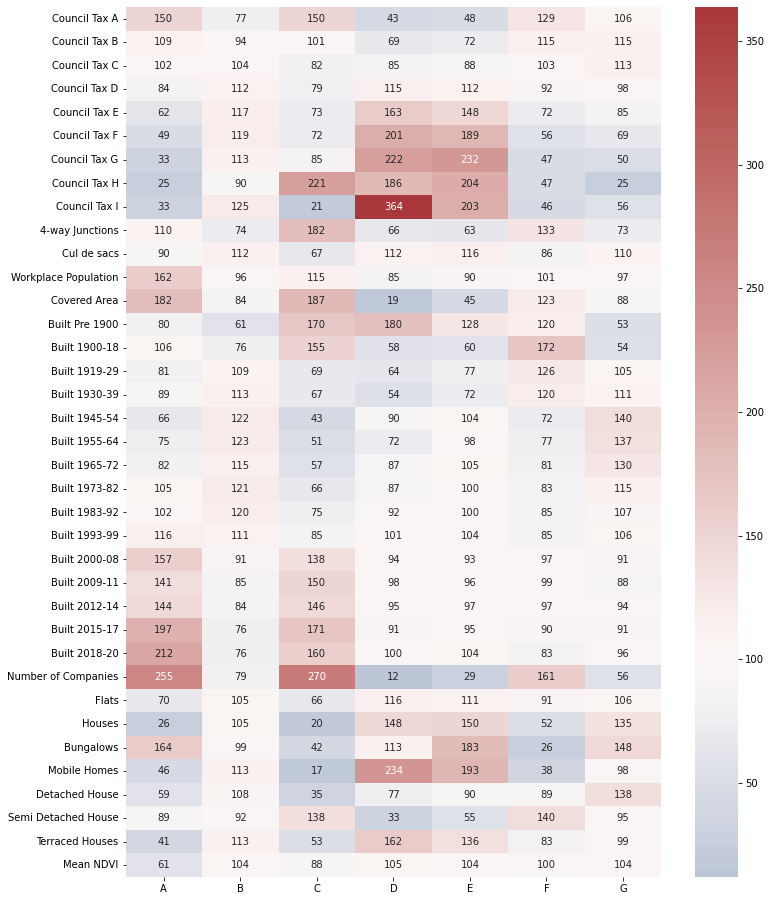

In [27]:
fig, ax = plt.subplots(figsize=(12, 16))
sns.heatmap(index_tab, cmap="vlag", annot=True, fmt='.0f', center=100,)
plt.savefig("figs/index_heatmap_10k.pdf", bbox_inches="tight")